In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def cluster_fig(x,y,cs, label):
    fig = plt.figure(figsize=(4, 4), facecolor='w')
    plt.scatter([x[ij] for ij in range(len(x)) if labels[ij]==0], [y[ij] for ij in range(len(x)) if labels[ij]==0], color = 'r', alpha = .3)
    plt.scatter([x[ij] for ij in range(len(x)) if labels[ij]==1], [y[ij] for ij in range(len(x)) if labels[ij]==1], color = 'b', alpha = .3)

    plt.scatter(c_s[-1][0][0], c_s[-1][0][1], color = 'r', marker ='x')
    plt.scatter(c_s[-1][1][0], c_s[-1][1][1], color = 'b', marker ='x')
    plt.title(label)
    return fig

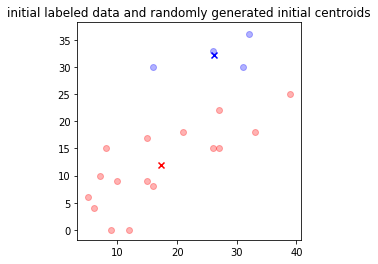

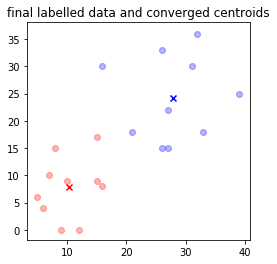

In [5]:

x = np.concatenate((np.random.randint(0, high=20, size= 10), np.random.randint(15, high=40, size= 10)))
y = np.concatenate((np.random.randint(0, high=20, size= 10), np.random.randint(15, high=40, size= 10)))

k = 2
c_s = [[[np.random.randint(0, high=40),np.random.randint(0, high=40)] for ik in range(k)]]

def dist(_x, _y, _c):
    return ((_x-_c[0])**2 + (_y-_c[1])**2)**(.5)

converge = []
for ip in range(1,10): # run 10 iterations
    labels = []
    for ik in range(len(x)): # for each (x,y) pair
        temp = []
        
        # calculate the distance from point to each of the current centroids 
        # assign label of centroid that is minimum distance away
        for c in c_s[-1]: 
            temp.append(dist(x[ik], y[ik], c)) 
        labels.append(np.argmin(temp)) # 
    
    # update centroid coordinates to be averge of associated labelled points
    c_s.append([[np.mean([x[ij] for ij in range(len(x)) if labels[ij]==ik]), np.mean([y[ij] for ij in range(len(y)) if labels[ij]==ik])] for ik in range(k)])
    
    # track convergence of centroids to stable coordinates
    converge.append([dist(c_s[ip-1][0][0], c_s[ip-1][0][1], c_s[ip][0]), dist(c_s[ip-1][1][0], c_s[ip-1][1][1], c_s[ip][1])])    
    
    if ip==1:
        fig1 = cluster_fig(x,y,c_s, 'initial labeled data and randomly generated initial centroids')
        plt.savefig('cluster_ex_init.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
        
fig2 = cluster_fig(x,y,c_s, 'final labelled data and converged centroids')
plt.savefig('cluster_ex_final.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

An additional note about the silhouette score: 

Compute the mean Silhouette Coefficient of all samples.
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). So a is the distance from a point to its labelled centroid and b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

As a practical matter it describes how close the clustering is within one cluster and how seperate the clusters are from each other. 